<a href="https://colab.research.google.com/github/rponeconsultoria/rponeconsultoria/blob/main/RandomForest_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Libs Essenciais

# Libs para modelagem e matrizes
import numpy as np
import pandas as pd

# Libs para análises
import matplotlib.pyplot as plt
import seaborn as sns

# Libs para ignorar avisos
import warnings

# Desabilitando os avisos
warnings.filterwarnings('ignore')

In [29]:
#Lendo o dataframe
Base_Dados = pd.read_csv('diabetes - diabetes.csv.csv')

#Verificando
Base_Dados.head()

,N de Gestacoes,Glicose,Pressao Arterial(mm Hg),Espessura da Pele(mm),Nivel de Insulina,IMC(peso em kg/(altura em m)^2,DiabetesPedigreeFunction,Idade,Impactos a longo prazo
0,6,148,72,35,0,33.6,627.000,50,Positivo
1,1,85,66,29,0,26.6,351.000,31,Negativo
2,8,183,64,0,0,23.3,672.000,32,Positivo
3,1,89,66,23,94,28.1,167.000,21,Negativo
4,0,137,40,35,168,43.1,2.288,33,Positivo


In [4]:
#Dimensão do dataframe
Base_Dados.shape

(768, 9)

In [5]:
#Chamando campos nulos
Base_Dados.isnull().sum()

,0
N de Gestacoes,0
Glicose,0
Pressao Arterial(mm Hg),0
Espessura da Pele(mm),0
Nivel de Insulina,0
IMC(peso em kg/(altura em m)^2,0
DiabetesPedigreeFunction,0
Idade,0
Impactos a longo prazo,0


<Axes: title={'center': 'Verificando campos nulos'}>

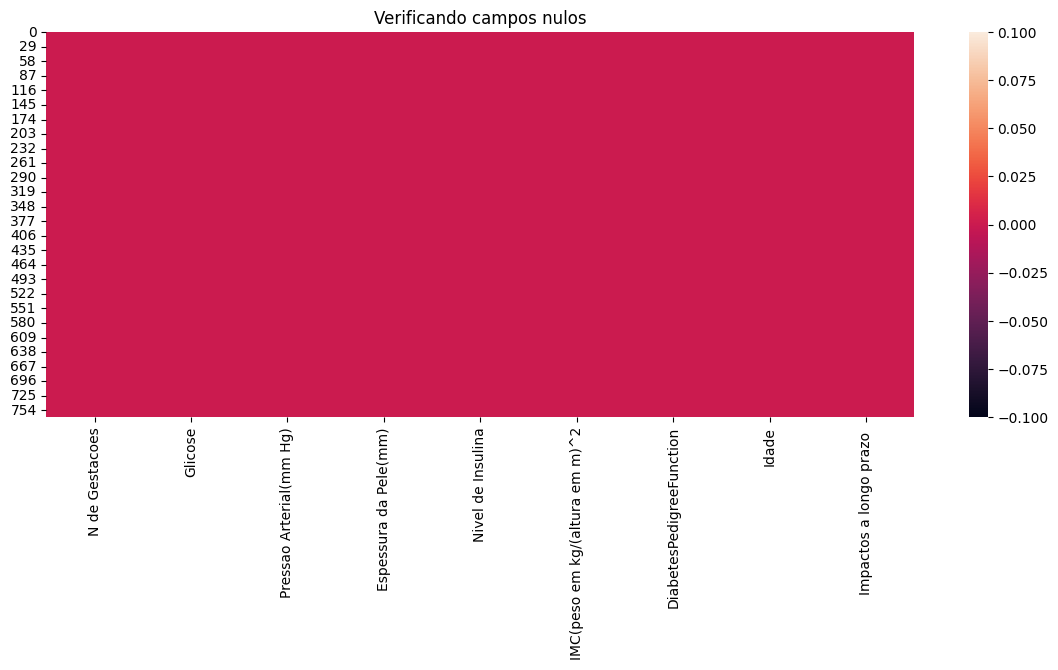

In [7]:
#Analisando de forma gráfica
plt.figure(figsize=(14,5))
plt.title('Verificando campos nulos')
sns.heatmap( Base_Dados.isnull())

In [8]:
#Estatísticas do DataFrame
Base_Dados.describe()

,N de Gestacoes,Glicose,Pressao Arterial(mm Hg),Espessura da Pele(mm),Nivel de Insulina,IMC(peso em kg/(altura em m)^2,DiabetesPedigreeFunction,Idade
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,347.079349,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,254.431659,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,165.000000,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,295.500000,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,527.250000,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,997.000000,81.000000


In [32]:
# Renomear a coluna
Base_Dados.rename(columns={'Impactos a longo prazo ': 'Possui diabetes?'}, inplace=True)

# Visualizar para confirmar
print(Base_Dados.columns)

Index(['N de Gestacoes', 'Glicose', 'Pressao Arterial(mm Hg)',
       'Espessura da Pele(mm)', 'Nivel de Insulina',
       'IMC(peso em kg/(altura em m)^2', 'DiabetesPedigreeFunction', 'Idade',
       'Possui diabetes?'],
      dtype='object')


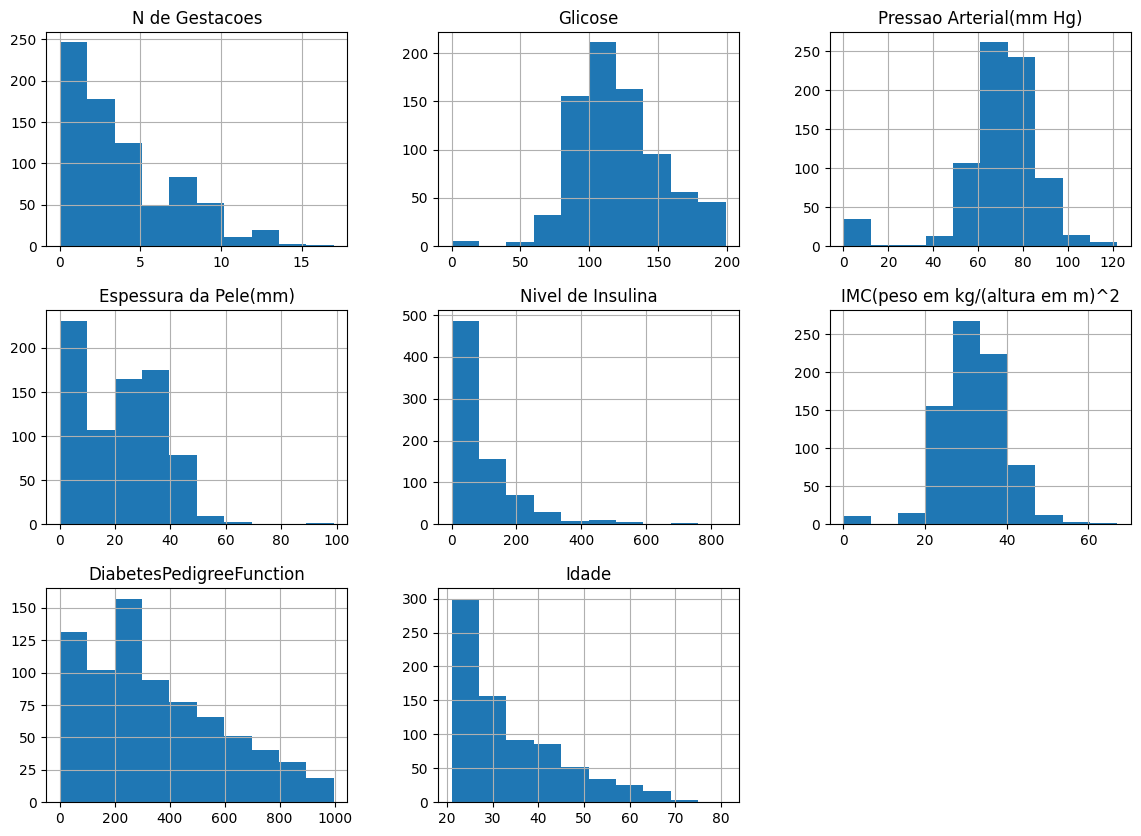

ValueError: could not convert string to float: 'Positivo'

In [33]:
# Histograma de todas as variáveis
Base_Dados.hist(figsize=(14,10))
plt.show()

# Mapa de correlação
sns.heatmap(Base_Dados.corr(), annot=True, cmap='coolwarm')
plt.show()



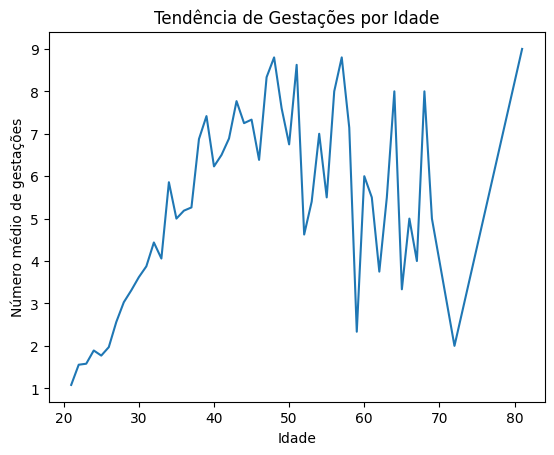

In [14]:
#Variação de Idade x Gestações
sns.lineplot(data=Base_Dados, x='Idade', y='N de Gestacoes', ci=None)
plt.title('Tendência de Gestações por Idade')
plt.ylabel('Número médio de gestações')
plt.xlabel('Idade')
plt.show()




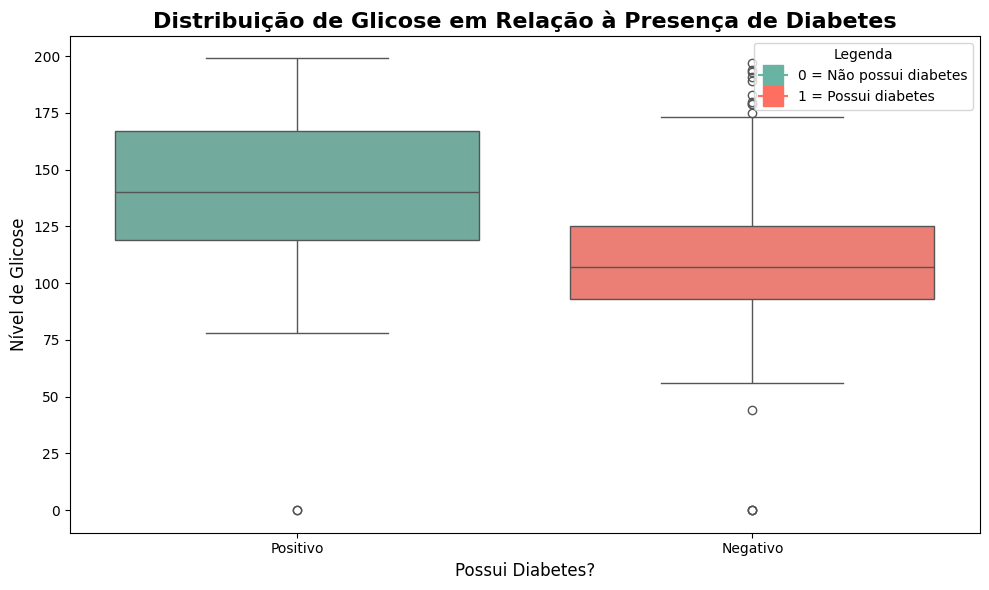

In [36]:
#Comparativo de Glicose x Resultado das Diabetes

# Tamanho da figura
plt.figure(figsize=(10,6))

# Cores customizadas
cores = ["#69b3a2", "#ff6f61"]

# Boxplot
sns.boxplot(x='Possui diabetes?', y='Glicose', data=Base_Dados, palette=cores)

# Título mais elegante
plt.title('Distribuição de Glicose em Relação à Presença de Diabetes', fontsize=16, fontweight='bold', loc='center')

# Labels mais descritivos
plt.xlabel('Possui Diabetes?', fontsize=12)
plt.ylabel('Nível de Glicose', fontsize=12)

# Adicionar legenda manual
legenda_labels = ['0 = Não possui diabetes', '1 = Possui diabetes']
plt.legend(handles=[
    plt.Line2D([], [], marker='s', color=cores[0], markersize=15, label=legenda_labels[0]),
    plt.Line2D([], [], marker='s', color=cores[1], markersize=15, label=legenda_labels[1])
], loc='upper right', title='Legenda')

# Mostrar o gráfico
plt.tight_layout()
plt.show()


In [25]:
# Importando Libs de ML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [37]:
X = Base_Dados.drop('Possui diabetes?', axis=1)  # features
y = Base_Dados['Possui diabetes?']               # target


In [38]:
# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Normalizar (opcional mas recomendável para certos modelos)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [39]:
# Treinando o modelo
modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [41]:
# Fazendo previsões
y_pred = modelo.predict(X_test)

In [42]:
# Avaliação do modelo
print("\n🎯 Avaliação do Modelo Random Forest:")
print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nMatriz de Confusão:\n", confusion_matrix(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))


🎯 Avaliação do Modelo Random Forest:
Acurácia: 0.7083333333333334

Matriz de Confusão:
 [[95 28]
 [28 41]]

Relatório de Classificação:
               precision    recall  f1-score   support

    Negativo       0.77      0.77      0.77       123
    Positivo       0.59      0.59      0.59        69

    accuracy                           0.71       192
   macro avg       0.68      0.68      0.68       192
weighted avg       0.71      0.71      0.71       192



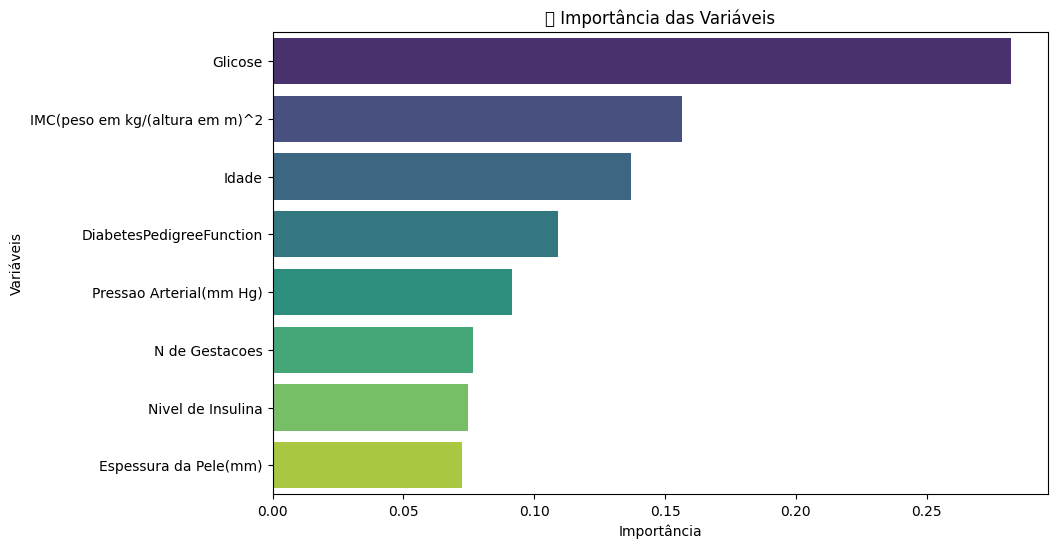

In [43]:
# 9. Ver importância das variáveis
importances = modelo.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

# Plotar
plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices], y=features[indices], palette="viridis")
plt.title('📊 Importância das Variáveis')
plt.xlabel('Importância')
plt.ylabel('Variáveis')
plt.show()


In [ ]:
#Podemos então concluir que o maior fator que influencia nos casos positivos de diabete, é a Glicose, e em segundo temos o IMC elevado, e em terceiro a Idade.